In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import humanize as hm
from keras.models import Sequential
from keras.layers import Dense, Activation
%matplotlib inline

In [135]:
gpdframe = pd.read_csv("datasets/gpd.csv")
column_names = np.arange(1990,2018,1)
carframe = pd.read_csv("datasets/car.csv",header=None,  names = column_names)
print(gpdframe)
print(carframe)

           1960          1961          1962          1963          1964  \
0  1.516557e+10  1.523685e+10  1.992629e+10  2.302148e+10  2.121189e+10   

           1965          1966          1967          1968          1969  \
0  2.179004e+10  2.706272e+10  3.059183e+10  3.387588e+10  3.745890e+10   

       ...               2007          2008          2009          2010  \
0      ...       1.397084e+12  1.695825e+12  1.667020e+12  2.208872e+12   

           2011          2012          2013           2014          2015  \
0  2.616202e+12  2.465189e+12  2.472807e+12  2455993200170  1.803653e+12   

           2016  
0  1.796187e+12  

[1 rows x 57 columns]
     1990    1991    1992     1993     1994     1995     1996     1997  \
0  712708  791508  771477  1166188  1426651  1684846  1728558  1931016   

      1998     1999   ...        2008     2009     2010     2011     2012  \
0  1546618  1176881   ...     2820963  3141009  3515039  3632974  3801703   

      2013     2014     2015   

In [136]:
car_amount=carframe.values[0]#carros vendidos por ano
gpd_values = gpdframe.values.astype(float)#PIB por ano
gpd_values = np.array(gpd_values[0])
car_amount_shape=car_amount[0:len(car_amount)-1]#adequanto valores
gpd_values_shape =gpd_values[30:len(gpd_values)]#adequando valores

In [137]:
print(car_amount_shape.shape)
print(gpd_values_shape.shape)

(27,)
(27,)


In [138]:
print(hm.intword(max(car_amount_shape)))#imprimindo o maior valor no array
print(hm.intword(max(gpd_values_shape)))

3.8 million
2.6 trillion


In [139]:
car_amount_norm=car_amount_shape/(10**6)#fracionando o número inicial
gpd_values_norm=gpd_values_shape/(10**12)

In [140]:
car_amount=car_amount_norm
gpd_values=gpd_values_norm
print(car_amount)
print(gpd_values)

[0.712708 0.791508 0.771477 1.166188 1.426651 1.684846 1.728558 1.931016
 1.546618 1.176881 1.411752 1.586928 1.466487 1.431381 1.578836 1.714724
 1.925898 2.462605 2.820963 3.141009 3.515039 3.632974 3.801703 3.767165
 3.497818 2.56898  2.05024 ]
[0.46195178 0.60286    0.40059925 0.43779858 0.558112   0.78564346
 0.85042583 0.88319944 0.8637234  0.59938888 0.65542115 0.5593725
 0.50796274 0.55832012 0.66931624 0.89162997 1.10764033 1.39708438
 1.69582452 1.66701961 2.20887165 2.61620158 2.46518867 2.47280692
 2.4559932  1.80365265 1.79618659]


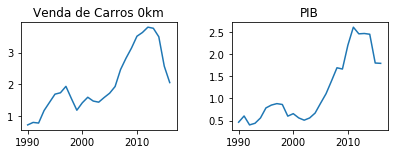

In [141]:
years=np.arange(1990,2017,1)
#
plt.subplot(221)
plt.plot(years,car_amount)
plt.title('Venda de Carros 0km')
#
#
plt.subplot(222)
plt.plot(years,gpd_values)
plt.title('PIB')
#
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
plt.show()

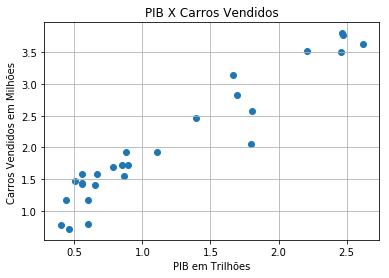

In [148]:
plt.scatter(gpd_values,car_amount)
plt.grid(True)
plt.xlabel('PIB em Trilhões')
plt.ylabel('Carros Vendidos em Milhões ')
plt.title('PIB X Carros Vendidos')
plt.show()

In [160]:
model = Sequential()#definindo o modelo
model.add(Dense(1, input_dim=1))#tipo de camada
model.add(Activation('linear'))#ativação
model.compile(optimizer='sgd',loss='mse')#otimização
model.fit(gpd_values,car_amount,epochs=100,verbose=0);#execução

In [158]:
weights = model.layers[0].get_weights()
w = weights[0][0][0]
b = weights[1][0]

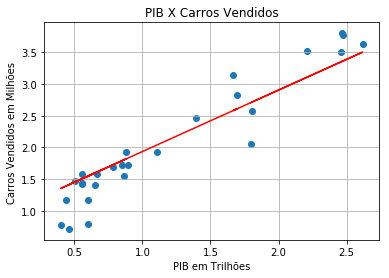

In [159]:
plt.scatter(gpd_values,car_amount)
plt.grid(True)
plt.xlabel('PIB em Trilhões')
plt.ylabel('Carros Vendidos em Milhões ')
plt.title('PIB X Carros Vendidos')
plt.plot(gpd_values, w*gpd_values + b, c='red')
plt.show()
